In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [52]:
df=pd.read_csv('Walmart_Sales.csv')

In [53]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [55]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [56]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [57]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Outlier

In [58]:
Q1 = df['Store'].quantile(0.25)
Q3 = df['Store'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Store'] < lower_bound) | (df['Store'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []


In [59]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [60]:
df.shape

(6435, 8)

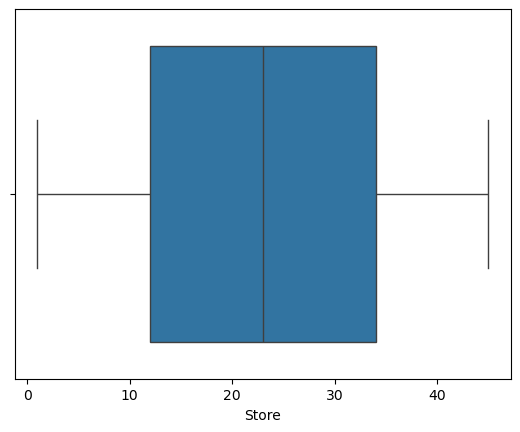

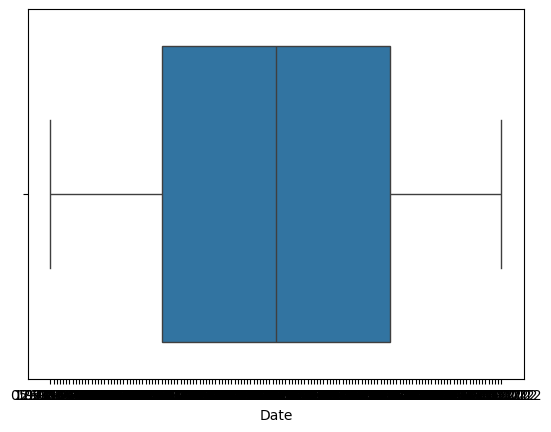

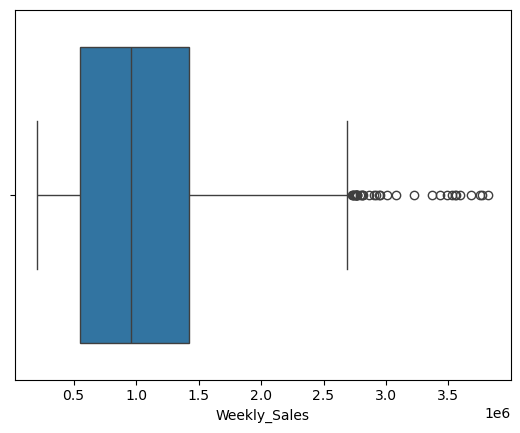

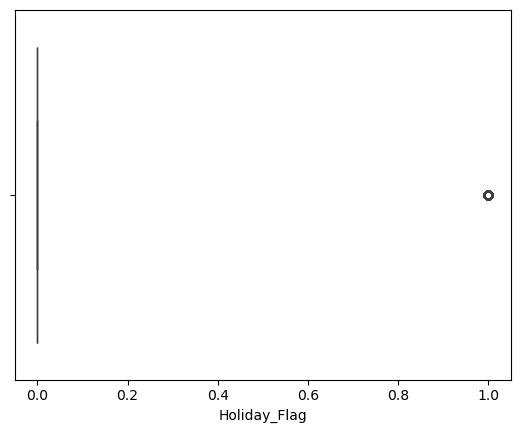

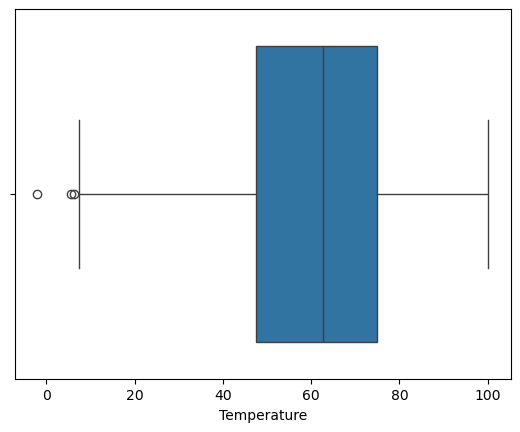

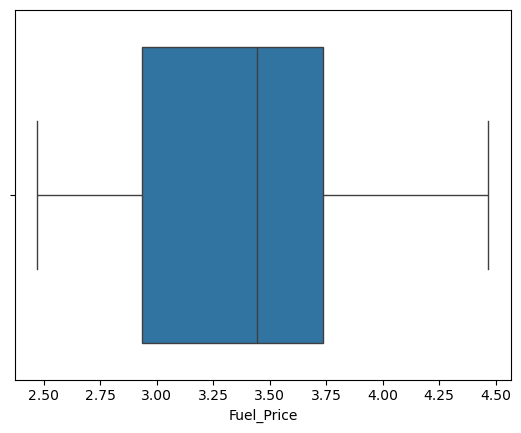

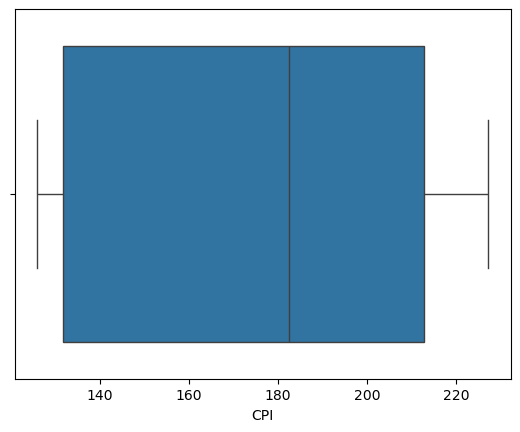

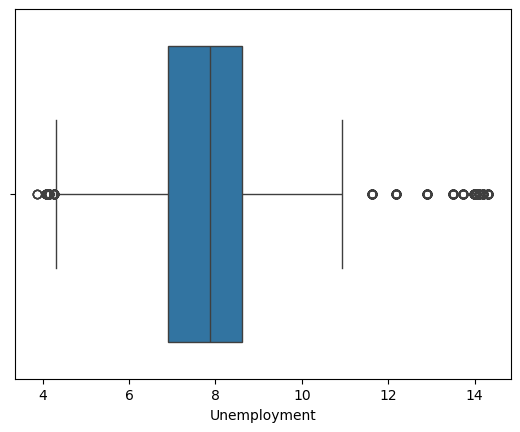

In [ ]:
col=df.columns
for colum in col:
    plt.figure()
    sns.boxplot(x=df[colum])
    plt.show()


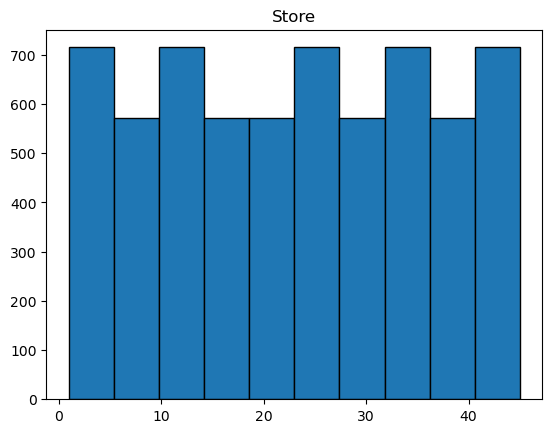

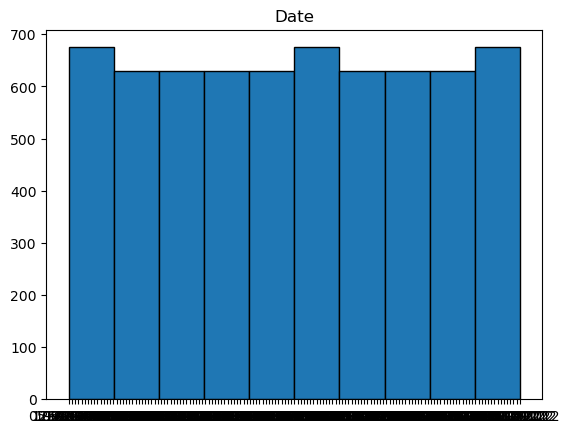

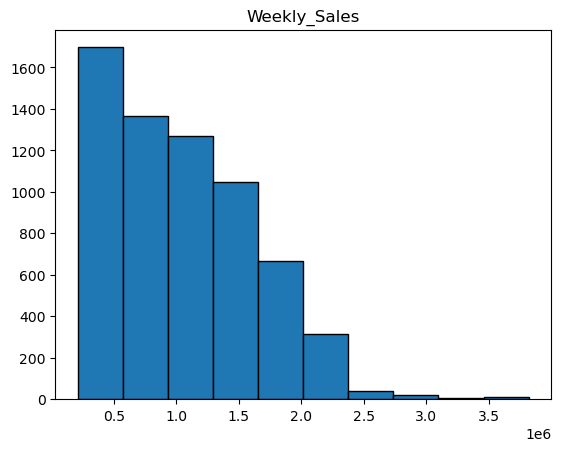

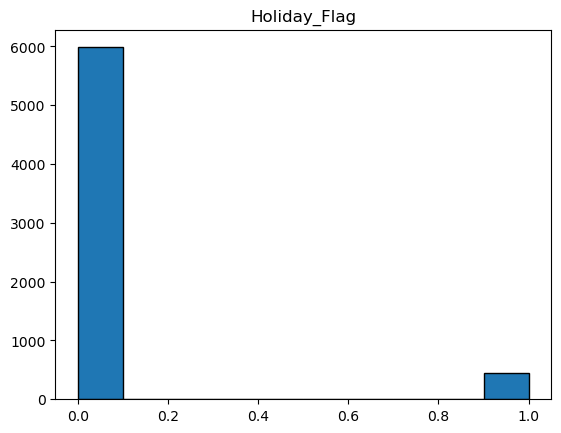

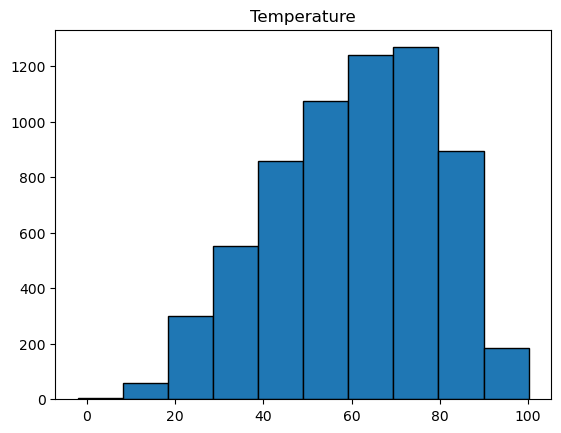

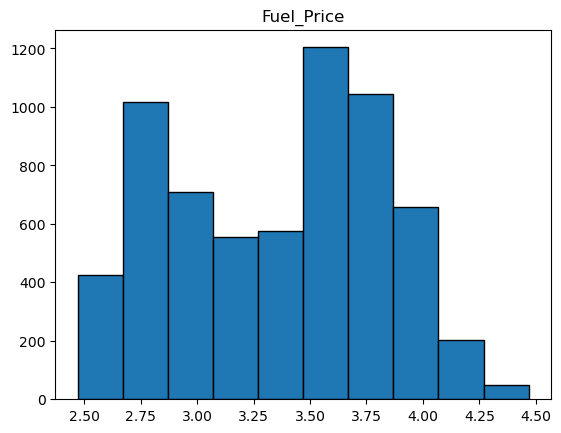

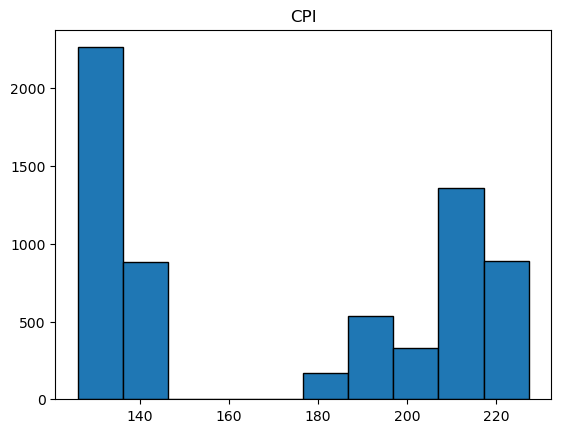

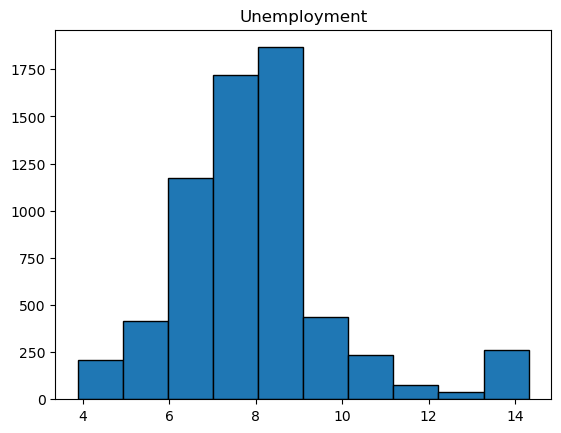

In [62]:
col=df.columns
for colum in col:
    plt.figure()
    #sns.boxplot(x=df[colum])
    plt.hist(df[colum], edgecolor='black')
    plt.title(f'{colum}')
    plt.show()

In [63]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y", errors='coerce')


In [64]:

for dup in df.columns:
    print(df[dup].duplicated().sum())

6390
6292
0
6433
2907
5543
4290
6086


Skewness Checking

In [65]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    print(f'{col}: {skew(df[col])}')

Store: 0.0
Weekly_Sales: 0.6682059921068103
Holiday_Flag: 3.372712257208553
Temperature: -0.3366890954177888
Fuel_Price: -0.09613588414498364
CPI: 0.06347704896208373
Unemployment: 1.1878669589215638


Outliner handling

In [72]:


Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = df[(df['Unemployment'] < lower) | (df['Unemployment'] > upper)]
print(outliers.count())
df_cleaned = df[(df['Unemployment'] >= lower) & (df['Unemployment'] <= upper)]



Store           481
Date            481
Weekly_Sales    481
Holiday_Flag    481
Temperature     481
Fuel_Price      481
CPI             481
Unemployment    481
dtype: int64


In [73]:
df_cleaned.shape

(5954, 8)

In [74]:
for col in df_cleaned.select_dtypes(include=['int64','float64']).columns:
    print(f'{col}: {skew(df_cleaned[col])}')

Store: 0.03180398438541424
Weekly_Sales: 0.6767648831594769
Holiday_Flag: 3.364450165941356
Temperature: -0.35095476298132333
Fuel_Price: -0.0815100920202826
CPI: -0.08833813220090904
Unemployment: -0.10032655652172441


Skew handling

In [77]:
import numpy as np

df_cleaned['Weekly_Sales'] = np.log1p(df_cleaned['Weekly_Sales'])
skew(df_cleaned['Weekly_Sales'])


C:\Users\HP\AppData\Local\Temp\ipykernel_4500\632547362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Weekly_Sales'] = np.log1p(df_cleaned['Weekly_Sales'])


np.float64(-0.36909357571332263)

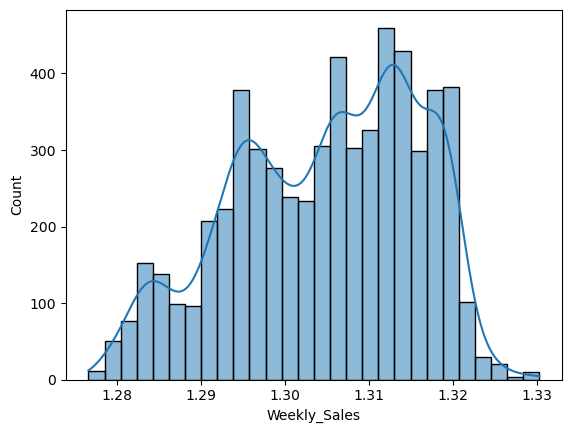

In [78]:
sns.histplot(df_cleaned['Weekly_Sales'], kde=True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4500\869390407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Unemployment'] = np.log1p(df_cleaned['Unemployment'])


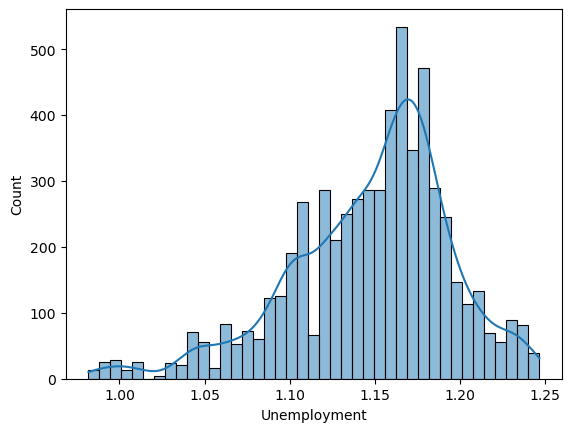

In [81]:
df_cleaned['Unemployment'] = np.log1p(df_cleaned['Unemployment'])
sns.histplot(df_cleaned['Unemployment'], kde=True)
plt.show()

In [ ]:
X = df_cleaned.drop(["Weekly_Sales"], axis=1)
y=df_cleaned['Weekly_Sales']
df_cleaned.drop('Date', axis=1, inplace=True)


In [92]:
y.head()

0    1.316051
1    1.316032
2    1.315709
3    1.313344
4    1.315075
Name: Weekly_Sales, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
poly = PolynomialFeatures(degree=2, include_bias=False)  # include_bias=False avoids extra column of ones
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [100]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [102]:
# Predict
y_pred = model.predict(X_test_poly)

# Evaluate
print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 score: 0.25620443555188965
Mean Squared Error: 9.00605931601132e-05


In [104]:
# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=200,   # Number of trees
    max_depth=None,     # Let trees grow fully
    min_samples_split=2,
    random_state=42,
    n_jobs=-1           # Use all CPU cores
)


In [105]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [106]:
y_pred = rf_model.predict(X_test)


In [107]:
print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R2 score: 0.972577765924609
Mean Squared Error: 3.3203514307559043e-06
